In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

In [6]:
df = pd.read_csv('C:/Users/Ashwani/Downloads/Pokemon.csv')

In [7]:
columns = df.columns.tolist()
columns[0] = 'id'
df.columns = columns
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df.head()

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
scaler = StandardScaler().fit(df[cols])
df_scaled = scaler.transform(df[cols])
print(df_scaled[:,0].mean())
print(df_scaled[:,0].std()) 

-2.486899575160351e-16
1.0


In [10]:
# I opt to use as many principal components as necessary to explain 80% of the variance in the original dataset.


In [11]:
pca = PCA(n_components=0.8)  # consider enough components to explain 80% of the variance
pca.fit(df_scaled)
pcscores = pd.DataFrame(pca.transform(df_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

In [12]:
#What the PCA does is construct new variables (or principal components) that explain most of the variance or scatter of the original dataset. Each component is a linear combination of all the variables and is perpendicular to every other component. Each variable in each component is multiplied by set of factors, the loading factors, which transforms the original data into this new component space. These loading factors are constrained so that the square of the sum is equal to 1, hence they can serve as weights to see which parameters are most important for a particular principal component.

[Text(0, 0.5, 'HP'),
 Text(0, 1.5, 'Attack'),
 Text(0, 2.5, 'Defense'),
 Text(0, 3.5, 'Sp. Atk'),
 Text(0, 4.5, 'Sp. Def'),
 Text(0, 5.5, 'Speed')]

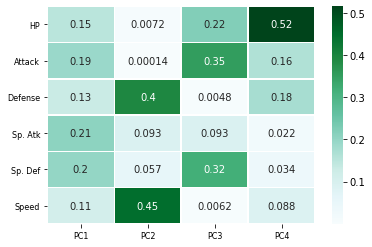

In [13]:
load_sqr = loadings**2
ax = sns.heatmap(load_sqr.transpose(), linewidths=0.5, cmap="BuGn", annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)

In [15]:
#The darkest shades in the plot above indicate which parameters are the most important. For example, the loading factors for PC4 show that HP is the most dominant parameter. That is, Pokemon with high HP will have high absolute values of PC4.

[Text(0, 0.5, 'HP'),
 Text(0, 1.5, 'Attack'),
 Text(0, 2.5, 'Defense'),
 Text(0, 3.5, 'Sp. Atk'),
 Text(0, 4.5, 'Sp. Def'),
 Text(0, 5.5, 'Speed')]

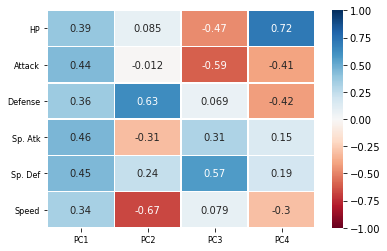

In [16]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)

In [18]:
# Here you can see some more trends. For example, a Pokemon with high Defense or low Speed will have a positive value of PC2. On the other hand, things like Attack or Sp. Defense will control what value a Pokemon will have for PC3.


In [52]:
best = pc_types.sort_values(by='PC4', ascending=False)[:2]
df.loc[best.index]

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,type
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,10
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,10


In [53]:
df.sort_values(by='HP', ascending=False)[:2]

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,type
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,10
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,10


In [54]:
#indeed, the Pokemons with the highest HP also have the highest PC4, as expected.

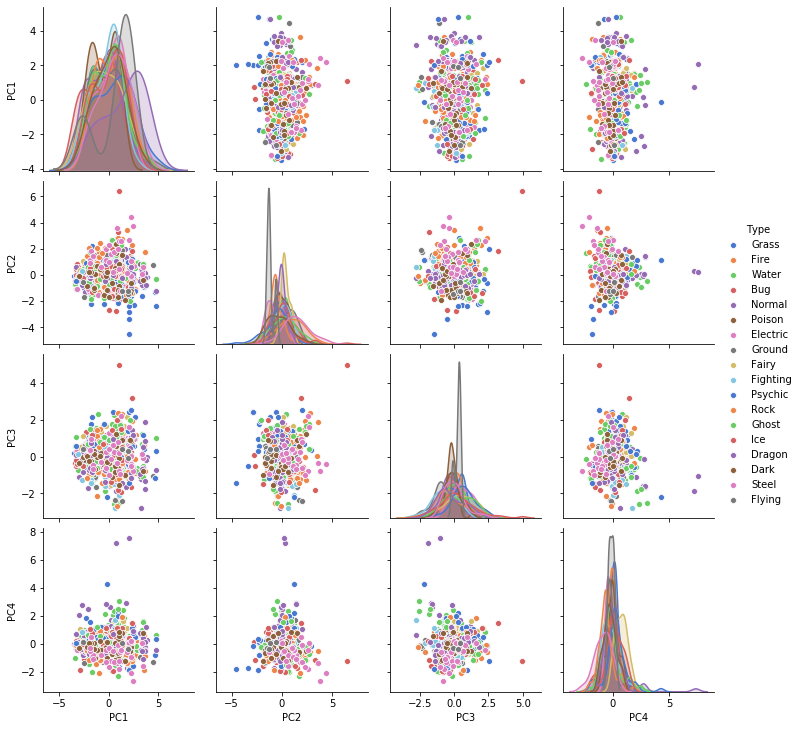

In [55]:
g = sns.pairplot(pc_types, hue='Type', palette='muted')

In [56]:
#Again, we can't see a strong trend with Pokemon type. Out of curiosity, what's the Bug-type pokemon with high PC2 and PC3 values?

In [57]:
print(pc_types.sort_values(by='PC2', ascending=False)[:1])
print(pc_types.sort_values(by='PC3', ascending=False)[:1])

          PC1      PC2       PC3       PC4 Type
230  1.076565  6.41447  4.979344 -1.204517  Bug
          PC1      PC2       PC3       PC4 Type
230  1.076565  6.41447  4.979344 -1.204517  Bug


In [58]:
df.loc[230]



id                213
Name          Shuckle
Type 1            Bug
Type 2           Rock
Total             505
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
type                7
Name: 230, dtype: object

In [59]:
# This is Shuckle, a bug-type Pokemon with very high Defense and Sp. Def at the cost of Attack attributes. Indeed, the PC2-PC3 biplot reveals how it can be used to select high-defense Pokemon. These will be located towards the top right (high PC2 and PC3 values).


In [68]:
labels = set(df['Type 1'])
df['type'] = df['Type 1']
lab_dict = dict()
for i, elem in enumerate(labels):
    lab_dict[elem] = i
df = df.replace({'type' : lab_dict})

pc_types = pcscores.copy()
pc_types['Type'] = df['Type 1']
def make_plot(pcscores, loadings, xval=0, yval=1, max_arrow=0.2, alpha=0.4):
    n = loadings.shape[1]
    scalex = 1.0 / (pcscores.iloc[:, xval].max() - pcscores.iloc[:, xval].min())  # Rescaling to be from -1 to +1
    scaley = 1.0 / (pcscores.iloc[:, yval].max() - pcscores.iloc[:, yval].min())

    pcscores.iloc[:, xval] = pcscores.iloc[:, xval] * scalex
    pcscores.iloc[:, yval] = pcscores.iloc[:, yval] * scaley

    g = sns.lmplot(x='PC{}'.format(xval + 1), y='PC{}'.format(yval + 1), hue='Type', data=pcscores,
                   fit_reg=False, size=6, palette='muted')

    for i in range(n):
        length = sqrt(loadings.iloc[xval, i] ** 2 + loadings.iloc[yval, i] ** 2)
        if length < max_arrow:
            continue

        plt.arrow(0, 0, loadings.iloc[xval, i], loadings.iloc[yval, i], color='k', alpha=0.9)
        plt.text(loadings.iloc[xval, i] * 1.15, loadings.iloc[yval, i] * 1.15,
                 loadings.columns.tolist()[i], color='k', ha='center', va='center')

    g.set(ylim=(-1, 1))
    g.set(xlim=(-1, 1))

C:\Users\Ashwani\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


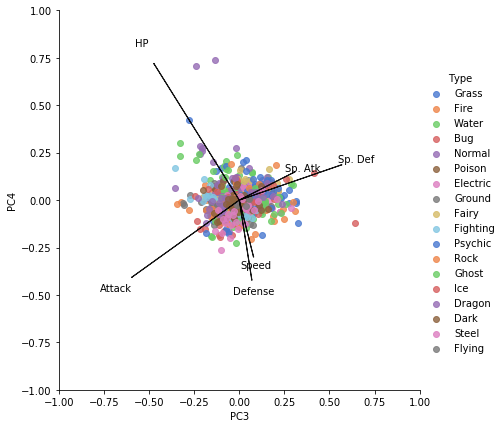

In [69]:
make_plot(pc_types, loadings, 2, 3, max_arrow=0.3)

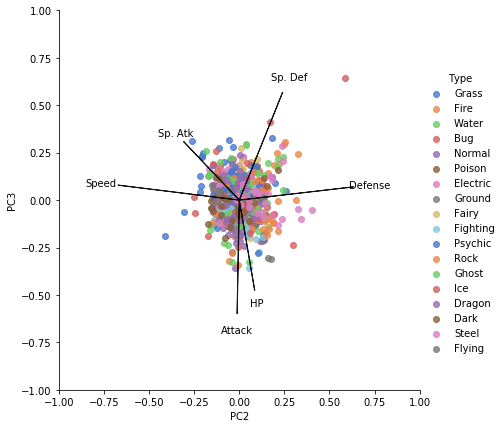

In [70]:
make_plot(pc_types, loadings, 1, 2, max_arrow=0.3)